<a href="https://colab.research.google.com/github/rojan-herald/concepts_and_technologies_of_ai/blob/main/Worksheet10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Classifier and Feature Selection (sklearn datasets)

This notebook uses only datasets available directly from sklearn.

Contents:
1. Sentiment Analysis using a text dataset and Naive Bayes
2. Feature Selection using RFE on the Breast Cancer dataset

## Part 1: Text Classification using Naive Bayes

In [1]:

# Imports
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:

# Load text dataset from sklearn
# Using two categories to simulate binary sentiment classification
categories = ['rec.sport.hockey', 'sci.space']

data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

texts = data.data
labels = data.target


In [3]:

# Text Preprocessing
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

texts_clean = [preprocess_text(text) for text in texts]


In [4]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    texts_clean, labels, test_size=0.2, random_state=42
)


In [5]:

# Bag-of-Words and Naive Bayes
vectorizer = CountVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)


MultinomialNB()

In [6]:

# Evaluation
y_pred = nb_model.predict(X_test_vec)
y_prob = nb_model.predict_proba(X_test_vec)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.949748743718593

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       202
           1       0.96      0.94      0.95       196

    accuracy                           0.95       398
   macro avg       0.95      0.95      0.95       398
weighted avg       0.95      0.95      0.95       398


Confusion Matrix:
 [[194   8]
 [ 12 184]]
ROC-AUC: 0.993685593049101


## Part 2: Feature Selection using RFE (Breast Cancer Dataset)

In [7]:

# Imports
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, f1_score


In [8]:

# Load Breast Cancer dataset from sklearn
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names


In [9]:

# Basic EDA
print("Shape:", X.shape)
print("Target distribution:", np.bincount(y))


Shape: (569, 30)
Target distribution: [212 357]


In [10]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:

# RFE with Logistic Regression (Top 5 Features)
log_reg = LogisticRegression(max_iter=5000)
rfe = RFE(log_reg, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

selected_features = feature_names[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: ['radius error' 'worst radius' 'worst texture' 'worst area'
 'worst concave points']


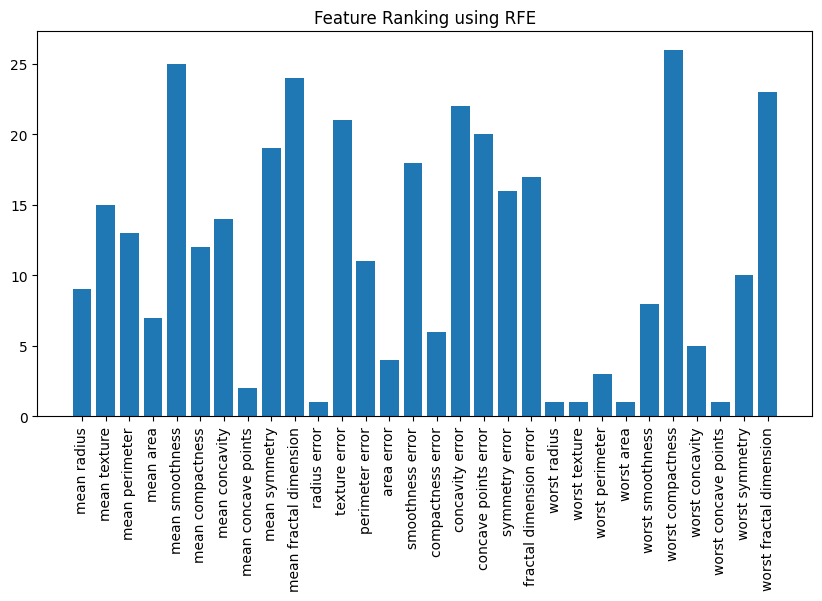

In [12]:

# Feature Ranking Visualization
plt.figure(figsize=(10, 5))
plt.bar(feature_names, rfe.ranking_)
plt.xticks(rotation=90)
plt.title("Feature Ranking using RFE")
plt.show()


In [13]:

# Train model with selected features
X_train_sel = X_train_scaled[:, rfe.support_]
X_test_sel = X_test_scaled[:, rfe.support_]

log_reg.fit(X_train_sel, y_train)
y_pred = log_reg.predict(X_test_sel)
y_prob = log_reg.predict_proba(X_test_sel)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1-Score: 0.9790209790209791
ROC-AUC: 0.9977071732721914


In [14]:

# Experiment: Top 3 and Top 7 Features
for k in [3, 7]:
    rfe_k = RFE(log_reg, n_features_to_select=k)
    rfe_k.fit(X_train_scaled, y_train)

    X_train_k = X_train_scaled[:, rfe_k.support_]
    X_test_k = X_test_scaled[:, rfe_k.support_]

    log_reg.fit(X_train_k, y_train)
    y_pred_k = log_reg.predict(X_test_k)

    print(f"\nTop {k} Features Accuracy:", accuracy_score(y_test, y_pred_k))



Top 3 Features Accuracy: 0.9649122807017544

Top 7 Features Accuracy: 0.9736842105263158
